In [1]:
#import libraries for use
import pandas as pd
import keras as k
from keras.models import model_from_json
import numpy as np
import matplotlib
import math
import openpyxl

In [2]:
#Import data from https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv
#Saved in same folder as file
csv = pd.read_csv('coin_Bitcoin.csv')
csv = csv[csv['Volume'] > 0]

In [3]:
#Describe data of csv
csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2749 entries, 242 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2749 non-null   int64  
 1   Name       2749 non-null   object 
 2   Symbol     2749 non-null   object 
 3   Date       2749 non-null   object 
 4   High       2749 non-null   float64
 5   Low        2749 non-null   float64
 6   Open       2749 non-null   float64
 7   Close      2749 non-null   float64
 8   Volume     2749 non-null   float64
 9   Marketcap  2749 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 236.2+ KB


In [4]:
#Show a few of the top rows of the data
csv.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
242,243,Bitcoin,BTC,2013-12-27 23:59:59,777.510010,713.599976,763.280029,735.070007,46862700.0,8.955395e+09
243,244,Bitcoin,BTC,2013-12-28 23:59:59,747.059998,705.349976,737.979980,727.830017,32505800.0,8.869919e+09
244,245,Bitcoin,BTC,2013-12-29 23:59:59,748.609985,714.440002,728.049988,745.049988,19011300.0,9.082104e+09
245,246,Bitcoin,BTC,2013-12-30 23:59:59,766.599976,740.239990,741.349976,756.130005,20707700.0,9.217168e+09
246,247,Bitcoin,BTC,2013-12-31 23:59:59,760.580017,738.169983,760.320007,754.010010,20897300.0,9.191325e+09


In [5]:
#Show a few of the bottom rows of the data
csv.tail(10)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2981,2982,Bitcoin,BTC,2021-06-27 23:59:59,34656.127356,32071.757148,32287.523211,34649.644588,3.551164e+10,6.494617e+11
2982,2983,Bitcoin,BTC,2021-06-28 23:59:59,35219.891791,33902.075892,34679.122222,34434.335314,3.389252e+10,6.454428e+11
2983,2984,Bitcoin,BTC,2021-06-29 23:59:59,36542.111018,34252.484892,34475.559697,35867.777735,3.790146e+10,6.723334e+11
2984,2985,Bitcoin,BTC,2021-06-30 23:59:59,36074.759757,34086.151878,35908.388054,35040.837249,3.405904e+10,6.568525e+11
2985,2986,Bitcoin,BTC,2021-07-01 23:59:59,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11
2990,2991,Bitcoin,BTC,2021-07-06 23:59:59,35038.536363,33599.916169,33723.509655,34235.193451,2.650126e+10,6.418992e+11


In [6]:
#Describe the general distribution of the numeric columns
csv.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2.749000e+03,2.749000e+03
mean,1617.000000,7477.294496,7036.727796,7268.361953,7280.272226,1.186644e+10,1.312580e+11
std,793.712269,11969.528338,11170.691310,11603.570695,11613.792111,1.941175e+10,2.169846e+11
min,243.000000,211.731003,171.509995,176.897003,178.102997,2.857830e+06,2.444379e+09
25%,930.000000,508.220001,482.951996,495.454987,495.665985,4.872260e+07,6.944861e+09
50%,1617.000000,3743.387971,3619.182130,3671.369989,3671.203705,2.219410e+09,6.406376e+10
75%,2304.000000,9164.362260,8727.089844,8912.524340,8909.953651,1.757206e+10,1.589499e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


<AxesSubplot:xlabel='FormattedDate'>

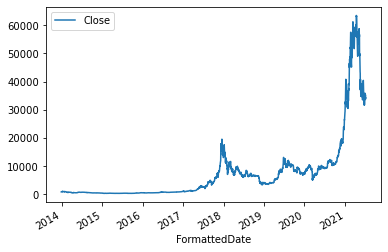

In [7]:
csv['FormattedDate'] = pd.to_datetime(csv['Date'])
csv['RollingAvg7Days'] = csv['Close'].shift().rolling(window=7).mean()
csv.plot('FormattedDate', 'Close')

<AxesSubplot:xlabel='FormattedDate'>

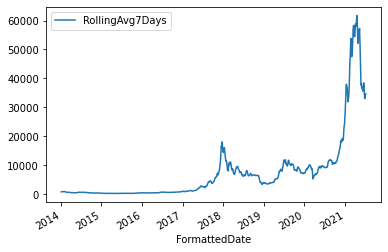

In [8]:
csv.plot('FormattedDate', 'RollingAvg7Days')

In [9]:
#Add Different Rolling Averages for Closing and Volume over time
csv['RollingNextDay'] = csv['Close'].shift(-1).rolling(window=1).mean()
csv['RollingAvg1Days'] = csv['Close'].shift().rolling(window=1).mean()
csv['RollingAvg3Days'] = csv['Close'].shift().rolling(window=3).mean()
csv['RollingAvg15Days'] = csv['Close'].shift().rolling(window=15).mean()
csv['RollingAvg30Days'] = csv['Close'].shift().rolling(window=30).mean()
csv['RollingAvg90Days'] = csv['Close'].shift().rolling(window=90).mean()
csv['RollingAvg180Days'] = csv['Close'].shift().rolling(window=180).mean()
csv['RollingAvg360Days'] = csv['Close'].shift().rolling(window=360).mean()

csv['RollingVolumeAvg1Days'] = csv['Volume'].shift().rolling(window=1).mean()
csv['RollingVolumeAvg3Days'] = csv['Volume'].shift().rolling(window=3).mean()
csv['RollingVolumeAvg7Days'] = csv['Volume'].shift().rolling(window=7).mean()
csv['RollingVolumeAvg15Days'] = csv['Volume'].shift().rolling(window=15).mean()
csv['RollingVolumeAvg30Days'] = csv['Volume'].shift().rolling(window=30).mean()
csv['RollingVolumeAvg90Days'] = csv['Volume'].shift().rolling(window=90).mean()
csv['RollingVolumeAvg180Days'] = csv['Volume'].shift().rolling(window=180).mean()
csv['RollingVolumeAvg360Days'] = csv['Volume'].shift().rolling(window=360).mean()


In [10]:
#Create the day's fluctuation given recent time periods, try to standardize
csv['NextDayFluctuation'] = (csv['RollingNextDay'] / csv['Close']) -1
csv['Days1Fluctuation'] = (csv['Close'] / csv['RollingAvg1Days']) -1
csv['Days3Fluctuation'] = (csv['Close'] / csv['RollingAvg3Days']) -1
csv['Days7Fluctuation'] = (csv['Close'] / csv['RollingAvg7Days']) -1
csv['Days15Fluctuation'] = (csv['Close'] / csv['RollingAvg15Days']) -1
csv['Days30Fluctuation'] = (csv['Close'] / csv['RollingAvg30Days']) -1
csv['Days90Fluctuation'] = (csv['Close'] / csv['RollingAvg90Days']) -1
csv['Days180Fluctuation'] = (csv['Close'] / csv['RollingAvg180Days']) -1
csv['Days360Fluctuation'] = (csv['Close'] / csv['RollingAvg360Days']) -1

#Create the same for Volume numbers, try to standardize
csv['Days1FluctuationVolume'] = (csv['Volume'] / csv['RollingVolumeAvg1Days']) -1
csv['Days3FluctuationVolume'] = (csv['Volume'] / csv['RollingVolumeAvg3Days']) -1
csv['Days7FluctuationVolume'] = (csv['Volume'] / csv['RollingVolumeAvg7Days']) -1
csv['Days15FluctuationVolume'] = (csv['Volume'] / csv['RollingVolumeAvg15Days']) -1
csv['Days30FluctuationVolume'] = (csv['Volume'] / csv['RollingVolumeAvg30Days']) -1
csv['Days90FluctuationVolume'] = (csv['Volume'] / csv['RollingVolumeAvg90Days']) -1
csv['Days180FluctuationVolume'] = (csv['Volume'] / csv['RollingVolumeAvg180Days']) -1
csv['Days360FluctuationVolume'] = (csv['Volume'] / csv['RollingVolumeAvg360Days']) -1

#Add a nunmber to indicate where the close is compared to low and high
csv['CloseToHigh'] = csv['Close']/csv['High']
csv['CloseToLow'] = csv['Close']/csv['Low']

<AxesSubplot:xlabel='FormattedDate'>

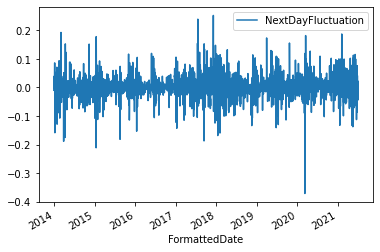

In [11]:
#Plot 1 day fluctuations
csv.plot('FormattedDate', 'NextDayFluctuation')

In [12]:
#Create some flags for large increases and decreases
csv['Over0PercentIncrease'] = csv['NextDayFluctuation'].gt(0.00)

In [13]:
#See how often over 10% occurs
print(csv['Over0PercentIncrease'].sum())
weights_for_0 = 2.0
weights_for_1 = 1.0

1473


In [14]:
#See how often a positive % occurs
csv['Over0PercentIncrease'].mean()

0.5358312113495817

In [15]:
#Run initial model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
#Selecting columns which will go into model, only those cases with values
csv = csv[csv.notnull().all(1)]
y_pos = csv['Over0PercentIncrease']
x_columns = ['Days1Fluctuation','Days3Fluctuation','Days7Fluctuation','Days15Fluctuation', \
 'Days30Fluctuation','Days90Fluctuation','Days180Fluctuation','Days360Fluctuation', \
'Days1FluctuationVolume','Days3FluctuationVolume','Days7FluctuationVolume','Days15FluctuationVolume', \
 'Days30FluctuationVolume','Days90FluctuationVolume','Days180FluctuationVolume','Days360FluctuationVolume', \
            'CloseToHigh','CloseToLow']

In [17]:
#Get x dataframe with values
x = csv[x_columns]

#Set up data as numpy arrays
y_numpy = y_pos.to_numpy()
x_numpy = x.to_numpy()

#Show some examples
print(y_numpy[0])
print(x_numpy[0])


#Split data for training
LengthOfData = len(x_numpy)
start_split_val = int(round(0.40 * LengthOfData,0))
split_val = int(round(0.95 * LengthOfData,0))
x_train =  x_numpy[start_split_val:split_val]
y_train = y_numpy[start_split_val:split_val]
x_test = x_numpy[split_val:]
y_test = y_numpy[split_val:]

True
[ 0.0344187   0.02789059  0.02243661 -0.02574925 -0.07012554 -0.09078958
 -0.27461166 -0.38076728  0.467365    0.11785284 -0.15453616  0.00517518
  0.17684453 -0.08701363  0.02034756 -0.12234104  0.99332264  1.03576812]


In [21]:
#Train Model

model = keras.Sequential(
    [
        keras.layers.Dense(
            32, activation="relu", input_shape=(x_train.shape[-1],)
        ),
#         keras.layers.Dense(34, activation="relu"),
#         keras.layers.Dropout(0.3),
#         keras.layers.Dense(32, activation="relu"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dropout(0.5),
#         keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()


# metrics = [
#    keras.metrics.FalseNegatives(name="fn"),
#    keras.metrics.FalsePositives(name="fp"),
#    keras.metrics.TrueNegatives(name="tn"),
#    keras.metrics.TruePositives(name="tp"),
#    keras.metrics.Precision(name="precision"),
#    keras.metrics.Recall(name="recall"),
# ]

model.compile(
    optimizer=keras.optimizers.Adam(0.001), loss="binary_crossentropy",
    metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.TruePositives()]
)

#callbacks = [keras.callbacks.ModelCheckpoint("bitcoin_pos_model_at{epoch}.h5")]
class_weight = {0: weights_for_0, 1: weights_for_1}



###Train Model - Not needed as model is trained.
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=500,
    verbose=2,
    validation_data=(x_test, y_test)
)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                608       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
____________________________________________________

Epoch 42/500
42/42 - 0s - loss: 0.6899 - binary_accuracy: 0.5381 - true_positives_2: 704.0000 - val_loss: 0.6959 - val_binary_accuracy: 0.4874 - val_true_positives_2: 58.0000
Epoch 43/500
42/42 - 0s - loss: 0.6899 - binary_accuracy: 0.5396 - true_positives_2: 705.0000 - val_loss: 0.6961 - val_binary_accuracy: 0.4874 - val_true_positives_2: 58.0000
Epoch 44/500
42/42 - 0s - loss: 0.6883 - binary_accuracy: 0.5388 - true_positives_2: 704.0000 - val_loss: 0.6963 - val_binary_accuracy: 0.4874 - val_true_positives_2: 58.0000
Epoch 45/500
42/42 - 0s - loss: 0.6908 - binary_accuracy: 0.5381 - true_positives_2: 702.0000 - val_loss: 0.6959 - val_binary_accuracy: 0.4874 - val_true_positives_2: 58.0000
Epoch 46/500
42/42 - 0s - loss: 0.6907 - binary_accuracy: 0.5365 - true_positives_2: 701.0000 - val_loss: 0.6960 - val_binary_accuracy: 0.4874 - val_true_positives_2: 58.0000
Epoch 47/500
42/42 - 0s - loss: 0.6891 - binary_accuracy: 0.5388 - true_positives_2: 704.0000 - val_loss: 0.6959 - val_binary

Epoch 89/500
42/42 - 0s - loss: 0.6889 - binary_accuracy: 0.5403 - true_positives_2: 709.0000 - val_loss: 0.6965 - val_binary_accuracy: 0.4874 - val_true_positives_2: 58.0000
Epoch 90/500
42/42 - 0s - loss: 0.6891 - binary_accuracy: 0.5396 - true_positives_2: 709.0000 - val_loss: 0.6971 - val_binary_accuracy: 0.4874 - val_true_positives_2: 58.0000
Epoch 91/500
42/42 - 0s - loss: 0.6892 - binary_accuracy: 0.5388 - true_positives_2: 708.0000 - val_loss: 0.6969 - val_binary_accuracy: 0.4874 - val_true_positives_2: 58.0000
Epoch 92/500
42/42 - 0s - loss: 0.6893 - binary_accuracy: 0.5403 - true_positives_2: 709.0000 - val_loss: 0.6972 - val_binary_accuracy: 0.4874 - val_true_positives_2: 58.0000
Epoch 93/500
42/42 - 0s - loss: 0.6876 - binary_accuracy: 0.5396 - true_positives_2: 709.0000 - val_loss: 0.6965 - val_binary_accuracy: 0.4874 - val_true_positives_2: 58.0000
Epoch 94/500
42/42 - 0s - loss: 0.6896 - binary_accuracy: 0.5396 - true_positives_2: 709.0000 - val_loss: 0.6968 - val_binary

Epoch 136/500
42/42 - 0s - loss: 0.6860 - binary_accuracy: 0.5381 - true_positives_2: 706.0000 - val_loss: 0.6953 - val_binary_accuracy: 0.4874 - val_true_positives_2: 58.0000
Epoch 137/500
42/42 - 0s - loss: 0.6866 - binary_accuracy: 0.5434 - true_positives_2: 709.0000 - val_loss: 0.6944 - val_binary_accuracy: 0.4874 - val_true_positives_2: 58.0000
Epoch 138/500
42/42 - 0s - loss: 0.6884 - binary_accuracy: 0.5396 - true_positives_2: 707.0000 - val_loss: 0.6944 - val_binary_accuracy: 0.4874 - val_true_positives_2: 58.0000
Epoch 139/500
42/42 - 0s - loss: 0.6853 - binary_accuracy: 0.5403 - true_positives_2: 708.0000 - val_loss: 0.6942 - val_binary_accuracy: 0.4874 - val_true_positives_2: 58.0000
Epoch 140/500
42/42 - 0s - loss: 0.6903 - binary_accuracy: 0.5396 - true_positives_2: 709.0000 - val_loss: 0.6945 - val_binary_accuracy: 0.4874 - val_true_positives_2: 58.0000
Epoch 141/500
42/42 - 0s - loss: 0.6863 - binary_accuracy: 0.5388 - true_positives_2: 707.0000 - val_loss: 0.6952 - val_

Epoch 183/500
42/42 - 0s - loss: 0.6846 - binary_accuracy: 0.5548 - true_positives_2: 610.0000 - val_loss: 0.6905 - val_binary_accuracy: 0.5042 - val_true_positives_2: 55.0000
Epoch 184/500
42/42 - 0s - loss: 0.6794 - binary_accuracy: 0.5502 - true_positives_2: 642.0000 - val_loss: 0.6911 - val_binary_accuracy: 0.5042 - val_true_positives_2: 55.0000
Epoch 185/500
42/42 - 0s - loss: 0.6841 - binary_accuracy: 0.5441 - true_positives_2: 630.0000 - val_loss: 0.6916 - val_binary_accuracy: 0.4958 - val_true_positives_2: 55.0000
Epoch 186/500
42/42 - 0s - loss: 0.6842 - binary_accuracy: 0.5479 - true_positives_2: 658.0000 - val_loss: 0.6920 - val_binary_accuracy: 0.5042 - val_true_positives_2: 58.0000
Epoch 187/500
42/42 - 0s - loss: 0.6832 - binary_accuracy: 0.5396 - true_positives_2: 644.0000 - val_loss: 0.6930 - val_binary_accuracy: 0.5042 - val_true_positives_2: 58.0000
Epoch 188/500
42/42 - 0s - loss: 0.6816 - binary_accuracy: 0.5320 - true_positives_2: 663.0000 - val_loss: 0.6934 - val_

Epoch 230/500
42/42 - 0s - loss: 0.6799 - binary_accuracy: 0.5693 - true_positives_2: 567.0000 - val_loss: 0.6907 - val_binary_accuracy: 0.4958 - val_true_positives_2: 46.0000
Epoch 231/500
42/42 - 0s - loss: 0.6809 - binary_accuracy: 0.5693 - true_positives_2: 549.0000 - val_loss: 0.6926 - val_binary_accuracy: 0.5042 - val_true_positives_2: 47.0000
Epoch 232/500
42/42 - 0s - loss: 0.6746 - binary_accuracy: 0.5495 - true_positives_2: 539.0000 - val_loss: 0.6909 - val_binary_accuracy: 0.4958 - val_true_positives_2: 47.0000
Epoch 233/500
42/42 - 0s - loss: 0.6798 - binary_accuracy: 0.5373 - true_positives_2: 533.0000 - val_loss: 0.6885 - val_binary_accuracy: 0.5126 - val_true_positives_2: 48.0000
Epoch 234/500
42/42 - 0s - loss: 0.6740 - binary_accuracy: 0.5533 - true_positives_2: 538.0000 - val_loss: 0.6893 - val_binary_accuracy: 0.5294 - val_true_positives_2: 47.0000
Epoch 235/500
42/42 - 0s - loss: 0.6765 - binary_accuracy: 0.5601 - true_positives_2: 509.0000 - val_loss: 0.6885 - val_

Epoch 277/500
42/42 - 0s - loss: 0.6679 - binary_accuracy: 0.5723 - true_positives_2: 515.0000 - val_loss: 0.6937 - val_binary_accuracy: 0.5210 - val_true_positives_2: 45.0000
Epoch 278/500
42/42 - 0s - loss: 0.6711 - binary_accuracy: 0.5654 - true_positives_2: 520.0000 - val_loss: 0.6870 - val_binary_accuracy: 0.5462 - val_true_positives_2: 45.0000
Epoch 279/500
42/42 - 0s - loss: 0.6713 - binary_accuracy: 0.5715 - true_positives_2: 445.0000 - val_loss: 0.6904 - val_binary_accuracy: 0.5462 - val_true_positives_2: 45.0000
Epoch 280/500
42/42 - 0s - loss: 0.6732 - binary_accuracy: 0.5731 - true_positives_2: 469.0000 - val_loss: 0.6955 - val_binary_accuracy: 0.5294 - val_true_positives_2: 45.0000
Epoch 281/500
42/42 - 0s - loss: 0.6701 - binary_accuracy: 0.5677 - true_positives_2: 465.0000 - val_loss: 0.6983 - val_binary_accuracy: 0.5294 - val_true_positives_2: 45.0000
Epoch 282/500
42/42 - 0s - loss: 0.6666 - binary_accuracy: 0.5540 - true_positives_2: 509.0000 - val_loss: 0.6949 - val_

Epoch 324/500
42/42 - 0s - loss: 0.6693 - binary_accuracy: 0.5776 - true_positives_2: 448.0000 - val_loss: 0.7041 - val_binary_accuracy: 0.5630 - val_true_positives_2: 43.0000
Epoch 325/500
42/42 - 0s - loss: 0.6585 - binary_accuracy: 0.5776 - true_positives_2: 455.0000 - val_loss: 0.7115 - val_binary_accuracy: 0.5714 - val_true_positives_2: 43.0000
Epoch 326/500
42/42 - 0s - loss: 0.6696 - binary_accuracy: 0.5898 - true_positives_2: 440.0000 - val_loss: 0.7120 - val_binary_accuracy: 0.5714 - val_true_positives_2: 42.0000
Epoch 327/500
42/42 - 0s - loss: 0.6684 - binary_accuracy: 0.5753 - true_positives_2: 419.0000 - val_loss: 0.7020 - val_binary_accuracy: 0.5714 - val_true_positives_2: 43.0000
Epoch 328/500
42/42 - 0s - loss: 0.6673 - binary_accuracy: 0.5670 - true_positives_2: 385.0000 - val_loss: 0.6965 - val_binary_accuracy: 0.5546 - val_true_positives_2: 41.0000
Epoch 329/500
42/42 - 0s - loss: 0.6647 - binary_accuracy: 0.5807 - true_positives_2: 378.0000 - val_loss: 0.7032 - val_

Epoch 371/500
42/42 - 0s - loss: 0.6580 - binary_accuracy: 0.5852 - true_positives_2: 426.0000 - val_loss: 0.7278 - val_binary_accuracy: 0.5294 - val_true_positives_2: 43.0000
Epoch 372/500
42/42 - 0s - loss: 0.6588 - binary_accuracy: 0.5761 - true_positives_2: 415.0000 - val_loss: 0.7341 - val_binary_accuracy: 0.5462 - val_true_positives_2: 43.0000
Epoch 373/500
42/42 - 0s - loss: 0.6620 - binary_accuracy: 0.5799 - true_positives_2: 408.0000 - val_loss: 0.7364 - val_binary_accuracy: 0.5378 - val_true_positives_2: 43.0000
Epoch 374/500
42/42 - 0s - loss: 0.6624 - binary_accuracy: 0.5761 - true_positives_2: 421.0000 - val_loss: 0.7432 - val_binary_accuracy: 0.5294 - val_true_positives_2: 42.0000
Epoch 375/500
42/42 - 0s - loss: 0.6603 - binary_accuracy: 0.5830 - true_positives_2: 397.0000 - val_loss: 0.7331 - val_binary_accuracy: 0.5378 - val_true_positives_2: 43.0000
Epoch 376/500
42/42 - 0s - loss: 0.6543 - binary_accuracy: 0.5982 - true_positives_2: 404.0000 - val_loss: 0.7177 - val_

Epoch 418/500
42/42 - 0s - loss: 0.6562 - binary_accuracy: 0.5928 - true_positives_2: 398.0000 - val_loss: 0.7776 - val_binary_accuracy: 0.5210 - val_true_positives_2: 44.0000
Epoch 419/500
42/42 - 0s - loss: 0.6554 - binary_accuracy: 0.5837 - true_positives_2: 406.0000 - val_loss: 0.7750 - val_binary_accuracy: 0.5210 - val_true_positives_2: 45.0000
Epoch 420/500
42/42 - 0s - loss: 0.6597 - binary_accuracy: 0.5852 - true_positives_2: 371.0000 - val_loss: 0.7965 - val_binary_accuracy: 0.5210 - val_true_positives_2: 46.0000
Epoch 421/500
42/42 - 0s - loss: 0.6671 - binary_accuracy: 0.5883 - true_positives_2: 417.0000 - val_loss: 0.7448 - val_binary_accuracy: 0.5462 - val_true_positives_2: 43.0000
Epoch 422/500
42/42 - 0s - loss: 0.6563 - binary_accuracy: 0.5845 - true_positives_2: 456.0000 - val_loss: 0.7458 - val_binary_accuracy: 0.5378 - val_true_positives_2: 42.0000
Epoch 423/500
42/42 - 0s - loss: 0.6615 - binary_accuracy: 0.5677 - true_positives_2: 367.0000 - val_loss: 0.7632 - val_

Epoch 465/500
42/42 - 0s - loss: 0.6572 - binary_accuracy: 0.5852 - true_positives_2: 381.0000 - val_loss: 0.8163 - val_binary_accuracy: 0.5042 - val_true_positives_2: 46.0000
Epoch 466/500
42/42 - 0s - loss: 0.6553 - binary_accuracy: 0.5974 - true_positives_2: 379.0000 - val_loss: 0.8352 - val_binary_accuracy: 0.4958 - val_true_positives_2: 44.0000
Epoch 467/500
42/42 - 0s - loss: 0.6434 - binary_accuracy: 0.5989 - true_positives_2: 390.0000 - val_loss: 0.8611 - val_binary_accuracy: 0.5126 - val_true_positives_2: 44.0000
Epoch 468/500
42/42 - 0s - loss: 0.6396 - binary_accuracy: 0.6104 - true_positives_2: 418.0000 - val_loss: 0.8486 - val_binary_accuracy: 0.5042 - val_true_positives_2: 45.0000
Epoch 469/500
42/42 - 0s - loss: 0.6538 - binary_accuracy: 0.6050 - true_positives_2: 416.0000 - val_loss: 0.8312 - val_binary_accuracy: 0.5042 - val_true_positives_2: 45.0000
Epoch 470/500
42/42 - 0s - loss: 0.6583 - binary_accuracy: 0.5967 - true_positives_2: 389.0000 - val_loss: 0.8534 - val_

In [22]:
# # serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)

# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")
model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy",
    metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.TruePositives()]
)
print("Loaded model from disk")

Saved model to disk


In [23]:
#Print results from last 100 days
model.evaluate(x_test[-100:],y_test[-100:])

4/4 [==============================] - 0s 2ms/step - loss: 0.9068 - binary_accuracy: 0.5000 - true_positives_2: 38.0000


[0.9068194031715393, 0.5, 38.0]

In [ ]:
#User input lookbackperiod from end of dataset
# Lookbackperiod = 10

In [24]:
model.predict(np.array( [x_test[-1],]))

array([[0.99496037]], dtype=float32)

In [25]:
y_true_vals = y_test[-10:]
predictions = model.predict(x_test[-10:])

In [26]:
for i in range(len(predictions)):
    print('Prediction {}% : Actual {}'.format(np.round(predictions[i][0] * 100,1),y_true_vals[i]))


Prediction 44.6% : Actual True
Prediction 43.4% : Actual False
Prediction 44.9% : Actual True
Prediction 43.7% : Actual False
Prediction 75.0% : Actual False
Prediction 87.6% : Actual True
Prediction 48.3% : Actual True
Prediction 99.6% : Actual True
Prediction 94.2% : Actual False
Prediction 99.5% : Actual True


In [30]:
print("Last Day of Data {}".format(max(csv['Date'])))

Last Day of Data 2021-07-06 23:59:59


In [28]:
#Pull in raw data
csv = pd.read_csv('coin_Bitcoin.csv')
csv = csv[csv['Volume'] > 0]

#Format data ro have model run on it
csv['FormattedDate'] = pd.to_datetime(csv['Date'])
csv['RollingAvg7Days'] = csv['Close'].shift().rolling(window=7).mean()
#Add Different Rolling Averages for Closing and Volume over time
csv['RollingNextDay'] = csv['Close'].shift(-1).rolling(window=1).mean()
csv['RollingAvg1Days'] = csv['Close'].shift().rolling(window=1).mean()
csv['RollingAvg3Days'] = csv['Close'].shift().rolling(window=3).mean()
csv['RollingAvg15Days'] = csv['Close'].shift().rolling(window=15).mean()
csv['RollingAvg30Days'] = csv['Close'].shift().rolling(window=30).mean()
csv['RollingAvg90Days'] = csv['Close'].shift().rolling(window=90).mean()
csv['RollingAvg180Days'] = csv['Close'].shift().rolling(window=180).mean()
csv['RollingAvg360Days'] = csv['Close'].shift().rolling(window=360).mean()

csv['RollingVolumeAvg1Days'] = csv['Volume'].shift().rolling(window=1).mean()
csv['RollingVolumeAvg3Days'] = csv['Volume'].shift().rolling(window=3).mean()
csv['RollingVolumeAvg7Days'] = csv['Volume'].shift().rolling(window=7).mean()
csv['RollingVolumeAvg15Days'] = csv['Volume'].shift().rolling(window=15).mean()
csv['RollingVolumeAvg30Days'] = csv['Volume'].shift().rolling(window=30).mean()
csv['RollingVolumeAvg90Days'] = csv['Volume'].shift().rolling(window=90).mean()
csv['RollingVolumeAvg180Days'] = csv['Volume'].shift().rolling(window=180).mean()
csv['RollingVolumeAvg360Days'] = csv['Volume'].shift().rolling(window=360).mean()


#Create the day's fluctuation given recent time periods, try to standardize
csv['NextDayFluctuation'] = (csv['RollingNextDay'] / csv['Close']) -1
csv['Days1Fluctuation'] = (csv['Close'] / csv['RollingAvg1Days']) -1
csv['Days3Fluctuation'] = (csv['Close'] / csv['RollingAvg3Days']) -1
csv['Days7Fluctuation'] = (csv['Close'] / csv['RollingAvg7Days']) -1
csv['Days15Fluctuation'] = (csv['Close'] / csv['RollingAvg15Days']) -1
csv['Days30Fluctuation'] = (csv['Close'] / csv['RollingAvg30Days']) -1
csv['Days90Fluctuation'] = (csv['Close'] / csv['RollingAvg90Days']) -1
csv['Days180Fluctuation'] = (csv['Close'] / csv['RollingAvg180Days']) -1
csv['Days360Fluctuation'] = (csv['Close'] / csv['RollingAvg360Days']) -1

#Create the same for Volume numbers, try to standardize
csv['Days1FluctuationVolume'] = (csv['Volume'] / csv['RollingVolumeAvg1Days']) -1
csv['Days3FluctuationVolume'] = (csv['Volume'] / csv['RollingVolumeAvg3Days']) -1
csv['Days7FluctuationVolume'] = (csv['Volume'] / csv['RollingVolumeAvg7Days']) -1
csv['Days15FluctuationVolume'] = (csv['Volume'] / csv['RollingVolumeAvg15Days']) -1
csv['Days30FluctuationVolume'] = (csv['Volume'] / csv['RollingVolumeAvg30Days']) -1
csv['Days90FluctuationVolume'] = (csv['Volume'] / csv['RollingVolumeAvg90Days']) -1
csv['Days180FluctuationVolume'] = (csv['Volume'] / csv['RollingVolumeAvg180Days']) -1
csv['Days360FluctuationVolume'] = (csv['Volume'] / csv['RollingVolumeAvg360Days']) -1

#Add a nunmber to indicate where the close is compared to low and high
csv['CloseToHigh'] = csv['Close']/csv['High']
csv['CloseToLow'] = csv['Close']/csv['Low']

#Create some flags for large increases and decreases
csv['DaySawIncrease'] = csv['NextDayFluctuation'].gt(0.00)

#Turn x into numpy for input into model
x = csv[x_columns]
x_numpy = x.to_numpy()

In [29]:
#Add predictions and formatted data to xlsx
csv['Predictions'] = model.predict(x_numpy)

In [31]:
#Export processed xlsx
csv.to_excel('csv_clean.xlsx')